# Neural Net CookBook
---
Seungwoo Schin - DataDiving

# Contents
- 1 Overview of the Whole Architecture 전체 아키텍쳐 개요                                  1
- 2 PyTorch Tensors and Basic Operations PyTorch 텐서 및 기본 작업                         5
- 3 Building Models                                                                       13
    - 3.1 Feedforward Network . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14
    - 3.2 Recurrent Neural Network . . . . . . . . . . . . . . . . . . . . . . . . . . . .15
    - 3.3 LSTM . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .17
    - 3.4 Transformer . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19
    - 3.5 Convolutional Neural Networks (CNNs) . . . . . . . . . . . . . . . . . . . . . .20
- 4 Training and Evaluating the Model                                                     21
    - 4.1 Standard Training Loop. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
    - 4.2 Model Evaluation and Metrics . . . . . . . . . . . . . . . . . . . . . . . . . .23
    - 4.3 Various Training Techniques . . . . . . . . . . . . . . . . . . . . . . . . . . 25
- 5 Loss Functions in PyTorch                                                             28
    - 5.1 Cheat Sheet(code) for each Loss Function . . . . . . . . . . . . . . . . . . . .30
    - 5.2 Explanation of Key Concepts . . . . . . . . . . . . . . . . . . . . . . . . . . 34
    - 5.3 Detailed Explanation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .35

# 1 Overview of the Whole Architecture 
- In this section, we will walk through the typical flow of deep learning code using PyTorch.
- The process involves several key steps:
- 이 섹션에서는 PyTorch를 사용한 딥러닝 코드의 일반적인 흐름을 살펴보겠습니다.
- 프로세스에는 몇 가지 주요 단계가 포함됩니다.
1. Collecting and preparing data.
2. Building the model.
3. Training the model.
4. Evaluating the model. 평가
5. Tuning hyperparameters.

- Each step is crucial for developing effective neural networks.
- Below, we provide detailed explana-tions and carefully crafted code examples for each part
- 각 단계는 효과적인 신경망을 개발하는 데 중요합니다.
- 아래에서는 각 부분에 대한 자세한 설명과 신중하게 작성된 코드 예제를 제공합니다.


- Collecting and Preparing Data
    The first step is to collect or generate data and prepare it for training.
    This involves converting data into tensors and creating datasets and data loaders.
- Converting Data into Tensors
    Assuming you have data in the form of NumPy arrays or lists, you can convert them into PyTorch tensors using torch.tensor.

- 데이터 수집 및 준비
    첫 번째 단계는 데이터를 수집하거나 생성하고 훈련을 위해 준비하는 것입니다.
    여기에는 데이터를 텐서로 변환하고 데이터세트와 데이터 로더를 만드는 작업이 포함됩니다.
- 데이터를 텐서로 변환
    NumPy 배열이나 목록 형식의 데이터가 있다고 가정하면 torch.tensor를 사용하여 이를 PyTorch 텐서로 변환할 수 있습니다.

In [ ]:
%pip install torch

In [7]:
import sys
print(*sys.path,sep='\n')


c:\Program Files\Python\Python311\python311.zip
c:\Program Files\Python\Python311\DLLs
c:\Program Files\Python\Python311\Lib
c:\Program Files\Python\Python311

C:\Users\mean71\AppData\Roaming\Python\Python311\site-packages
C:\Users\mean71\AppData\Roaming\Python\Python311\site-packages\win32
C:\Users\mean71\AppData\Roaming\Python\Python311\site-packages\win32\lib
C:\Users\mean71\AppData\Roaming\Python\Python311\site-packages\Pythonwin
c:\Program Files\Python\Python311\Lib\site-packages


In [1]:
import torch
import numpy as np
# Example data
features_np = np.random.rand(1000, 20) # 1000 samples, 20 features
labels_np = np.random.randint(0, 2, size=(1000,)) # Binary lables
# Convert to tensors
features = torch.tensor(features_np, dtype=torch.float32)
labels = torch.tensor(labels_np, dtype=torch.long)

In [13]:
print(features_np.shape,features_np, labels_np.shape,labels_np,
      features.shape,features, labels.shape,labels,sep='\n')

(1000, 20)
[[0.00684072 0.93486299 0.75734658 ... 0.41917167 0.15236814 0.94215189]
 [0.59340002 0.23168856 0.30169224 ... 0.00181095 0.31540756 0.88766938]
 [0.34653224 0.78146406 0.0590817  ... 0.61957007 0.23470428 0.20437096]
 ...
 [0.73711838 0.60889325 0.31348478 ... 0.81414219 0.26311309 0.32204877]
 [0.52008957 0.44153212 0.9555343  ... 0.68302891 0.72579487 0.06580118]
 [0.21470678 0.94494558 0.23799319 ... 0.38856581 0.0332741  0.3502273 ]]
(1000,)
[0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 1 0 0

- Creating a TensorDataset and DataLoader
- Once the data is in tensor form, we can create a TensorDataset and wrap it with a DataLoader for easy batching and shuffling.
- TensorDataset 및 DataLoader 만들기
- 데이터가 텐서 형식이면 TensorDataset를 생성하고 이를 DataLoader로 래핑하여 쉽게 일괄 처리하고 섞을 수 있습니다.

In [14]:
from torch.utils.data import TensorDataset, DataLoader
# Create a TensorDataset
dataset = TensorDataset(features, labels)
# Create a DataLoader
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
'''
from torch.utils.data import DataLoader

# 1번 인수: dataset
# - PyTorch에서 데이터를 관리하는 핵심 클래스인 Dataset의 인스턴스를 전달해야 함.
# - Dataset 클래스는 데이터를 어떻게 가져올지, 접근할지 정의함.
# - 예시: torchvision.datasets.MNIST 또는 커스텀 Dataset 클래스.

# 2번 인수: batch_size
# - 데이터를 몇 개씩 한 번에 처리할지 결정함.
# - 예를 들어, batch_size=32이면, 32개의 데이터를 한 묶음으로 처리함.
# - 기본값은 1.

# 3번 인수: shuffle
# - 매 epoch마다 데이터를 랜덤으로 섞을지 설정하는 옵션.
# - True로 설정하면 매번 데이터를 섞어서 학습 시 데이터 순서에 대한 의존을 줄임.
# - False로 설정하면 원래 순서대로 데이터를 처리함.
# - 기본값은 False.

# 4번 인수: sampler
# - 데이터를 어떻게 샘플링할지를 정의하는 객체.
# - 기본적으로 shuffle=True를 설정하면 내부적으로 RandomSampler가 사용됨.
# - 커스텀 샘플링 전략이 필요할 경우 사용할 수 있음.

# 5번 인수: batch_sampler
# - batch_size와 sampler를 결합하여 배치 단위로 샘플링하는 방법을 정의하는 옵션.
# - batch_sampler는 배치를 어떻게 구성할지 직접 정의할 수 있음.
# - 기본적으로는 사용하지 않음. batch_size와 sampler로 충분히 설정 가능.

# 6번 인수: num_workers
# - 데이터를 로드할 때 사용할 worker 프로세스의 수를 지정함.
# - 기본적으로 num_workers=0이면 데이터 로드는 메인 프로세스에서 이루어짐.
# - num_workers를 늘리면 데이터를 병렬로 로드할 수 있어 속도 향상 가능.

# 7번 인수: collate_fn
# - 각 batch에서 데이터를 어떻게 결합할지 정의하는 함수.
# - 기본적으로는 전달받은 데이터를 텐서로 묶어서 반환하지만, 커스텀 방식으로 결합할 때 사용할 수 있음.
# - 예를 들어, NLP에서 서로 길이가 다른 문장들을 패딩 처리할 때 사용 가능.

# 8번 인수: pin_memory
# - True로 설정하면, GPU 사용 시 데이터를 더 빠르게 전송할 수 있음.
# - CPU에서 GPU로 데이터를 복사할 때 성능을 향상시킬 수 있음.
# - GPU 사용 시 성능 최적화를 위해 True로 설정할 수 있음.
# - 기본값은 False.

# 9번 인수: drop_last
# - 데이터셋 크기가 배치 크기로 나누어 떨어지지 않을 때, 마지막 남은 배치를 버릴지 여부.
# - True로 설정하면 마지막 배치가 남은 경우 이를 버리고, False면 그대로 사용함.
# - 예를 들어, batch_size가 32이고, 데이터가 100개인 경우 마지막 4개 데이터를 버릴지 결정함.
# - 기본값은 False.

# DataLoader 예시
# dataset: PyTorch Dataset 객체
# batch_size: 한 번에 처리할 데이터의 크기
# shuffle: 데이터를 랜덤으로 섞을지 여부
# drop_last: 나머지 데이터가 남을 때 마지막 배치를 버릴지 여부

dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True, num_workers=4)

# DataLoader 사용 예시
for data, labels in dataloader:
    # data: 배치로 묶인 입력 데이터
    # labels: 해당 데이터에 맞는 레이블
    # 여기서 모델 학습 또는 예측 진행 가능
    pass
'''

- Explanation:
  - TensorDataset takes tensors as input and creates a dataset where each sample is a tuple of the tensors at a given index.
  - • DataLoader wraps the dataset and provides an iterable over the dataset with support for automatic batching, sampling, shuffling, and multiprocess data loading.
- Building the Model
  - Next, we define the neural network architecture by creating a subclass of torch.nn.Module.
- 설명:
  - TensorDataset는 텐서를 입력으로 사용하고 각 샘플이 주어진 인덱스에 있는 텐서의 튜플인 데이터세트를 생성합니다.
  - • DataLoader는 데이터 세트를 래핑하고 자동 일괄 처리, 샘플링, 셔플링 및 다중 프로세스 데이터 로드를 지원하여 데이터 세트에 대한 반복 가능 항목을 제공합니다.
- 모델 구축
  - 다음으로, torch.nn.Module의 하위 클래스를 생성하여 신경망 아키텍처를 정의합니다.

# RNN_Variants

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
# 랜덤시드고정
torch.manual_seed(42) # PyTorch의 랜덤 생성기를 초기화
random.seed(42) # 기본 파이썬 랜덤 생성기 초기화

def generate_dataset(num_samples, seq_length, vocab_size=3):
    delimiter = vocab_size - 1  # 마지막 인덱스를 구분 기호로 가정합니다.
    inputs = []  # 입력 시퀀스를 저장할 리스트 초기화
    targets = []  # 대상 시퀀스를 저장할 리스트 초기화
    # num_samples 만큼 반복하여 입력 및 대상 시퀀스를 생성합니다.
    for _ in range(num_samples):
        # 입력 시퀀스 생성: 0부터 (vocab_size - 2)까지의 무작위 정수를 seq_length 만큼 생성
        input_seq = [random.randint(0, vocab_size - 2) for _ in range(seq_length)]
        input_seq.append(delimiter)  # 구분 기호 추가
        inputs.append(input_seq)  # 생성된 입력 시퀀스를 입력 리스트에 추가
        targets.append(input_seq)  # 생성된 입력 시퀀스를 대상 리스트에도 추가 (구분 기호 없이)

    # 입력 및 대상 리스트를 텐서로 변환
    inputs_tensor = torch.tensor(inputs, dtype=torch.long)  # 입력 시퀀스를 텐서로 변환
    targets_tensor = torch.tensor(targets, dtype=torch.long)  # 대상 시퀀스를 텐서로 변환
    # targets_tensor = indices_to_one_hot(targets_tensor, vocab_size)
    # TensorDataset을 생성하여 입력 및 대상 시퀀스를 포함
    dataset = TensorDataset(inputs_tensor, targets_tensor)  
    return dataset

def generate_answer_mod_sum_prev_k(input_seq, mod, k):
    target_seq = []
    for i in range(len(input_seq)):
        if i < k:
            target_seq.append(sum(input_seq[:i+1]) % mod)
        else:
            target_seq.append(sum(input_seq[i-k+1:i+1]) % mod)
    return target_seq

def generate_dataset_mod_sum_prev_kn(num_samples, seq_length, vocab_size=128, mod=10, k=4):
    inputs = []
    targets = []
    for _ in range(num_samples):
        input_seq = [random.randint(0, vocab_size - 1) for _ in range(seq_length)]
        target_seq = generate_answer_mod_sum_prev_k(input_seq, mod, k)
        
        inputs.append(input_seq)
        targets.append(target_seq)
        
    inputs_tensor = torch.tensor(inputs, dtype=torch.long)
    targets_tensor = torch.tensor(targets, dtype=torch.long)
    # 
    dataset = TensorDataset(inputs_tensor, targets_tensor)
    return dataset
    

if __name__ == "__main__":
    # Hyperparameters
    VOCAB_SIZE = 16         # 단어집합 크기
    EMBEDDING_DIM = 8       # 임베딩 벡터 차원 : (벡터의 길이 설정) : (입력데이터 차원을 낮춰 표현)
    HIDDEN_DIM = 32         # 은닉층 벡터 차원
    OUTPUT_DIM = 10         # 출력층 벡터 차원 : 예측해야할 클래스(카테고리)개수
    SEQ_LENGTH = 50         # Length of the input sequence before the delimiter
    NUM_SAMPLES = 10000     # 샘플
    BATCH_SIZE = 64         # batch
    EPOCHS = 10             # epochs
    LEARNING_RATE = 0.001   # learning_rate
    LOOKBACK = 3            # 참조기간 : 시퀀스 데이터에서 과거의 몇 시점 까지 데이터정보를 참조 할지를 설정하는 값
    
    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')
    
    # Generate dataset
    # dataset = generate_dataset(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE)
    
    # Initialize models
    # Manual Implementations
    
    # Built-In Implementations

Using device: cpu

Epoch 1/10
RNN Manual | Train Loss: 2.3035 | Val Loss: 2.3014
LSTM Manual | Train Loss: 2.3026 | Val Loss: 2.3011
GRU Manual | Train Loss: 2.3021 | Val Loss: 2.3008
RNN Built-In | Train Loss: 2.3042 | Val Loss: 2.3018
LSTM Built-In | Train Loss: 2.3014 | Val Loss: 2.2976
GRU Built-In | Train Loss: 2.3021 | Val Loss: 2.2998

Epoch 2/10
RNN Manual | Train Loss: 2.2995 | Val Loss: 2.2993
LSTM Manual | Train Loss: 2.2990 | Val Loss: 2.2959
GRU Manual | Train Loss: 2.2991 | Val Loss: 2.2980
RNN Built-In | Train Loss: 2.3008 | Val Loss: 2.3008
LSTM Built-In | Train Loss: 2.2587 | Val Loss: 2.1434
GRU Built-In | Train Loss: 2.2915 | Val Loss: 2.2627

Epoch 3/10
RNN Manual | Train Loss: 2.2977 | Val Loss: 2.2981
LSTM Manual | Train Loss: 2.2805 | Val Loss: 2.2489
GRU Manual | Train Loss: 2.2933 | Val Loss: 2.2863
RNN Built-In | Train Loss: 2.2995 | Val Loss: 2.2988
LSTM Built-In | Train Loss: 1.8880 | Val Loss: 1.6841
GRU Built-In | Train Loss: 2.0638 | Val Loss: 1.8106

Epo

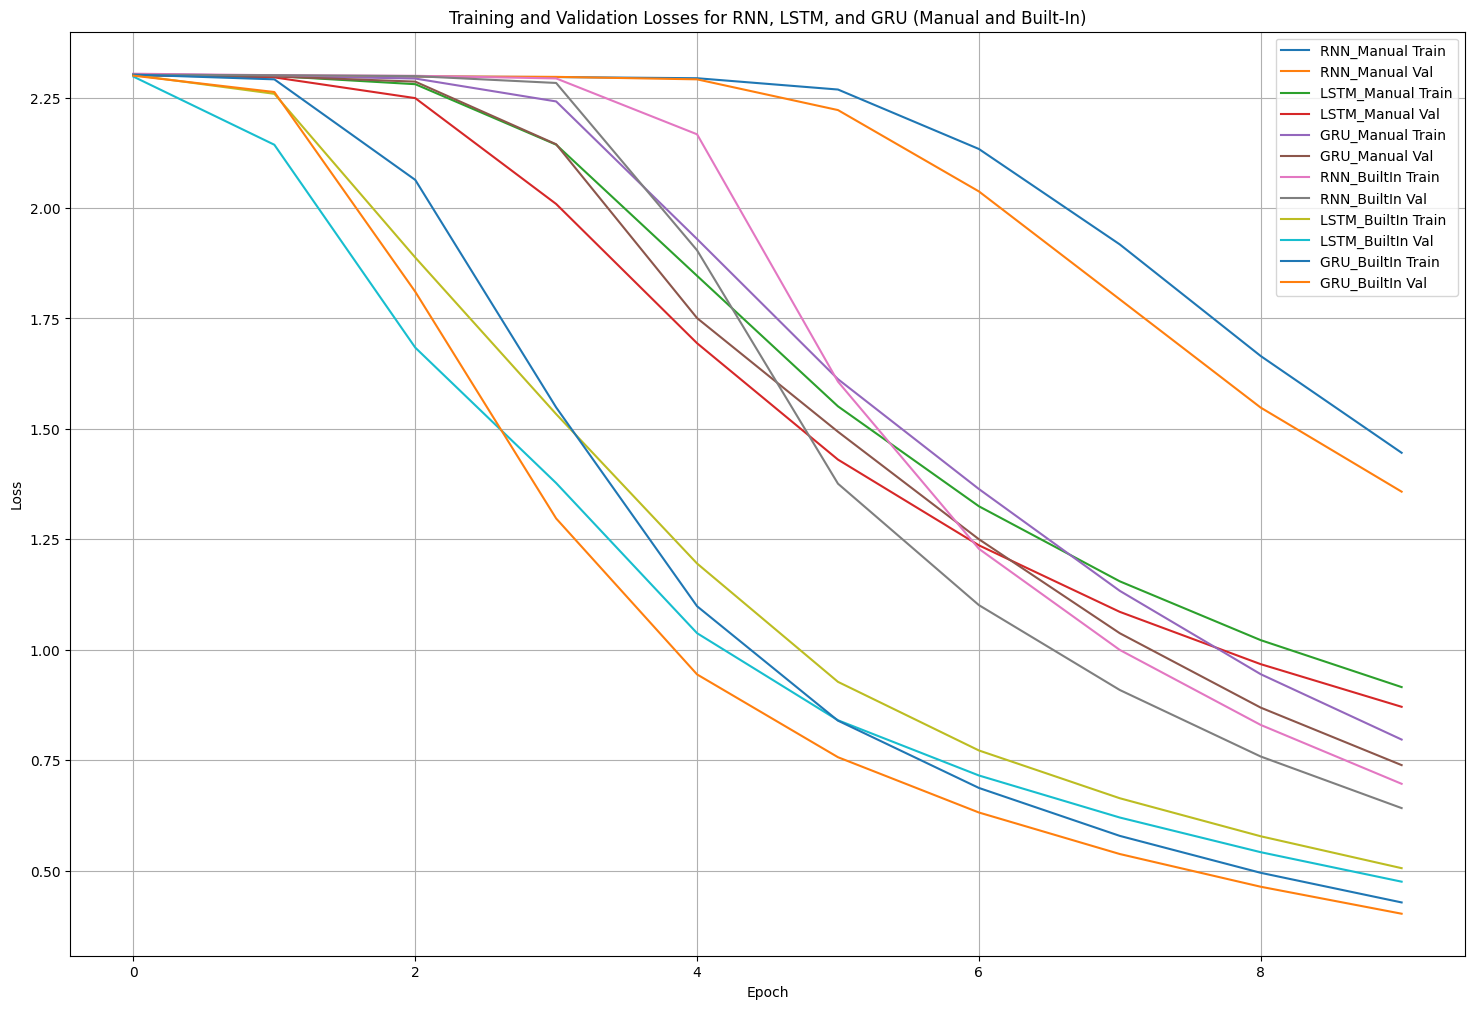


Final Validation Losses:
RNN_Manual: 1.3578
LSTM_Manual: 0.8707
GRU_Manual: 0.7387
RNN_BuiltIn: 0.6414
LSTM_BuiltIn: 0.4748
GRU_BuiltIn: 0.4022


In [16]:
"""
================================================= ===
RNN의 장기 종속성 문제 시연
================================================= ===
이 스크립트는 순환 신경망(RNN)에 내재된 장기 종속성 문제를 탐구합니다.
LSTM(Long Short-Term Memory) 및 GRU(Gated Recurrent Unit)와 같은 고급 아키텍처가 어떻게 사용되는지 보여줍니다.
이러한 과제를 해결하십시오. 실험에서는 다음과 같이 설계된 합성 데이터 세트인 Copy Task를 활용합니다.
확장된 시퀀스에 대한 정보를 유지하고 재현하는 모델의 능력을 테스트합니다.

주요 개념:

- 장기 의존성 문제: 기존 RNN은 긴 시퀀스에 걸쳐 정보를 유지하는 데 어려움을 겪습니다.
  관련 정보 간의 거리가 멀어질수록 성능 저하가 발생합니다.
- LSTM 및 GRU: 이러한 아키텍처는 유지 관리 및 관리를 허용하는 게이팅 메커니즘을 통합합니다.
  정보 흐름을 규제하여 장기적인 의존성 문제를 효과적으로 완화합니다.
- 복사 작업: 모델이 구분 기호 뒤의 입력 시퀀스를 재현해야 하는 간단하면서도 효과적인 작업입니다.
  이 설정은 긴 시퀀스를 기억하고 재현하는 모델의 기능을 평가하는 데 이상적입니다.

목적:

1. 데이터 세트 생성: 임베딩 레이어를 사용하지 않고 복사 작업을 위한 합성 데이터 세트를 생성합니다.
   각 모델 유형에 대해 두 가지 버전을 구현합니다.
   
   - 수동 구현: `nn.Linear` 레이어를 활용하여 모델 방정식을 직접 구현합니다.
   - 내장 구현: PyTorch의 내장 `nn.RNN`, `nn.LSTM` 및 `nn.GRU` 모듈 활용
     간소화된 모델 정의를 위한 임베딩 레이어가 있습니다.

2. 모델 정의: 수동 및 내장 구성 모두에서 RNN, LSTM 및 GRU 모델을 정의합니다.

3. 훈련 및 평가: 합성 데이터 세트에서 각 모델 변형을 훈련하고 성능을 평가합니다.
   LSTM과 GRU가 표준 RNN이 직면한 장기적인 종속성 문제를 어떻게 극복하는지 보여줍니다.
"""
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
# Set random seeds for reproducibility 재현성을 위한 랜덤시드설정
torch.manual_seed(42)
random.seed(42)

def generate_dataset(num_samples, seq_length, vocab_size=3):
    """
    복사 작업을 위한 합성 데이터세트를 생성합니다.
    복사 작업에서 각 입력 시퀀스는 일련의 기호와 구분 기호로 구성됩니다.
    대상 시퀀스는 입력 시퀀스의 복사본(구분 기호가 없는 정확한 기호 시퀀스)입니다.
    인수:
        num_samples (int): 생성할 샘플 수를 지정
        seq_length (int): 구분 기호 앞에 있는 입력 시퀀스의 길이를 지정
        vocab_size (int, 선택사항): 고유 기호 수. 기본값은 3(0, 1, 구분 기호)입니다.
    보고:
        TensorDataset: 입력 및 대상 시퀀스를 포함하는 PyTorch TensorDataset입니다.
    """
    delimiter = vocab_size - 1  # 마지막 인덱스를 구분 기호로 가정합니다.
    inputs = []  # 입력 시퀀스를 저장할 리스트 초기화
    targets = []  # 대상 시퀀스를 저장할 리스트 초기화
    # num_samples 만큼 반복하여 입력 및 대상 시퀀스를 생성합니다.
    for _ in range(num_samples):
        # 입력 시퀀스 생성: 0부터 (vocab_size - 2)까지의 무작위 정수를 seq_length 만큼 생성
        input_seq = [random.randint(0, vocab_size - 2) for _ in range(seq_length)]
        input_seq.append(delimiter)  # 구분 기호 추가
        inputs.append(input_seq)  # 생성된 입력 시퀀스를 입력 리스트에 추가
        targets.append(input_seq)  # 생성된 입력 시퀀스를 대상 리스트에도 추가 (구분 기호 없이)

    # 입력 및 대상 리스트를 텐서로 변환
    inputs_tensor = torch.tensor(inputs, dtype=torch.long)  # 입력 시퀀스를 텐서로 변환
    targets_tensor = torch.tensor(targets, dtype=torch.long)  # 대상 시퀀스를 텐서로 변환
    # targets_tensor = indices_to_one_hot(targets_tensor, vocab_size)
    # TensorDataset을 생성하여 입력 및 대상 시퀀스를 포함
    dataset = TensorDataset(inputs_tensor, targets_tensor)  
    return dataset  # 생성된 데이터셋 반환


def generate_answer_mod_sum_prev_k(input_seq, mod, k):
    target_seq = []
    for i in range(len(input_seq)):
        if i < k:
            target_seq.append(sum(input_seq[:i+1]) % mod)
        else:
            target_seq.append(sum(input_seq[i-k+1:i+1]) % mod)
    return target_seq


def generate_dataset_mod_sum_prev_k(num_samples, seq_length, vocab_size=128, mod=10, k=4):
    """
    이전 k 요소의 모듈러 합에 대한 합성 데이터 세트를 생성합니다.
    Example:
        when = 4, mod = 10
        input = [0, 4, 5, 6, 7, 8]
        target = [0, 4, 9, 5, 2, 6]
    """
    inputs = []
    targets = []
    for _ in range(num_samples):
        input_seq = [random.randint(0, vocab_size - 1) for _ in range(seq_length)]
        target_seq = generate_answer_mod_sum_prev_k(input_seq, mod, k)

        inputs.append(input_seq)
        targets.append(target_seq)


    inputs_tensor = torch.tensor(inputs, dtype=torch.long)
    targets_tensor = torch.tensor(targets, dtype=torch.long)
    # targets_tensor = indices_to_one_hot(targets_tensor, mod)
    dataset = TensorDataset(inputs_tensor, targets_tensor)
    return dataset


def indices_to_one_hot(tensor, vocab_size):
    # Get the shape of the input tensor except the last dimension
    shape = tensor.shape[:-1]
    # Get the last dimension (which contains the vocabulary indices)
    last_dim = tensor.shape[-1]
    # Flatten the tensor except the last dimension
    tensor_flat = tensor.view(-1, last_dim)
    # Create the one-hot encoded tensor with shape (total_elements, vocab_size)
    one_hot_flat = torch.nn.functional.one_hot(tensor_flat, num_classes=vocab_size)
    # Reshape the one-hot encoded tensor back to the original dimensions + vocab_size
    one_hot_tensor = one_hot_flat.view(*shape, last_dim, vocab_size)
    return one_hot_tensor.float()


# ================================
# Manual Implementations
# ================================

class RNNManual(nn.Module):
    """
    ===================================
    Manual Recurrent Neural Network (RNN)
    ===================================
    Architecture:
        Input -> Input-to-Hidden (Linear) -> Tanh Activation -> Hidden-to-Hidden (Linear) -> Output (Linear)
    Formula:
        h_t = tanh(W_ih * x_t + W_hh * h_{t-1} + b_h)
        o_t = W_ho * h_t + b_o
    설명:
        이 클래스는 PyTorch의 내장 RNN 모듈을 사용하지 않고 간단한 RNN을 수동으로 구현합니다.
        선형 레이어를 사용하여 숨겨진 상태와 출력을 계산합니다.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(RNNManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        self.W_ih = nn.Linear(vocab_size, hidden_dim)  # Input to hidden
        self.W_hh = nn.Linear(hidden_dim, hidden_dim)  # Hidden to hidden
        self.W_ho = nn.Linear(hidden_dim, output_dim)  # Hidden to output

    def forward(self, x):
        """
        Forward pass for the manual RNN.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            h_t = torch.tanh(self.W_ih(x_t) + self.W_hh(h_t))  # [batch_size, hidden_dim]
            o_t = self.W_ho(h_t)  # [batch_size, output_dim]
            outputs.append(o_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

class LSTMManual(nn.Module):
    """
    ========================================
    Manual Long Short-Term Memory (LSTM)
    ========================================

    Architecture:
        Input -> Input Gates (Linear Layers) -> LSTM Cell -> Output (Linear)

    Formula:
        i_t = sigmoid(W_ii * x_t + W_hi * h_{t-1} + b_i)
        f_t = sigmoid(W_if * x_t + W_hf * h_{t-1} + b_f)
        g_t = tanh(W_ig * x_t + W_hg * h_{t-1} + b_g)
        o_t = sigmoid(W_io * x_t + W_ho * h_{t-1} + b_o)
        c_t = f_t * c_{t-1} + i_t * g_t
        h_t = o_t * tanh(c_t)
        y_t = W_ho * h_t + b_y

    Description:
        This class manually implements an LSTM cell without using PyTorch's built-in LSTM modules.
        It includes input, forget, cell, and output gates to regulate information flow.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(LSTMManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        # Input gate components
        self.W_ii = nn.Linear(vocab_size, hidden_dim)
        self.W_hi = nn.Linear(hidden_dim, hidden_dim)
        # Forget gate components
        self.W_if = nn.Linear(vocab_size, hidden_dim)
        self.W_hf = nn.Linear(hidden_dim, hidden_dim)
        # Cell gate components
        self.W_ig = nn.Linear(vocab_size, hidden_dim)
        self.W_hg = nn.Linear(hidden_dim, hidden_dim)
        # Output gate components
        self.W_io = nn.Linear(vocab_size, hidden_dim)
        self.W_ho = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.W_yo = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the manual LSTM.
        1. 데이터 세트 생성: 임베딩 레이어를 사용하지 않고 복사 작업을 위한 합성 데이터 세트를 생성합니다.
        우리는 각 모델 유형에 대해 두 가지 버전을 구현합니다.
        - 수동 구현: `nn.Linear` 레이어를 사용하여 모델 방정식을 직접 구현합니다.
        - 내장 구현: PyTorch의 내장 `nn.RNN`, `nn.LSTM` 및 `nn.GRU` 모듈을 활용합니다.
        단순화된 모델 정의를 위한 임베딩 레이어가 있습니다.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        c_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            i_t = torch.sigmoid(self.W_ii(x_t) + self.W_hi(h_t))  # Input gate
            f_t = torch.sigmoid(self.W_if(x_t) + self.W_hf(h_t))  # Forget gate
            g_t = torch.tanh(self.W_ig(x_t) + self.W_hg(h_t))     # Cell gate
            o_t = torch.sigmoid(self.W_io(x_t) + self.W_ho(h_t))  # Output gate
            c_t = f_t * c_t + i_t * g_t                            # Cell state
            h_t = o_t * torch.tanh(c_t)                            # Hidden state
            y_t = self.W_yo(h_t)                                    # Output
            outputs.append(y_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

class GRUManual(nn.Module):
    """
    =======================================
    수동 게이트 순환 장치(GRU)
    =======================================
    Architecture:
        Input -> Update Gate (Linear Layers) -> Reset Gate (Linear Layers) -> GRU Cell -> Output (Linear)
    공식:
        z_t = sigmoid(W_iz * x_t + W_hz * h_{t-1} + b_z)
        r_t = sigmoid(W_ir * x_t + W_hr * h_{t-1} + b_r)
        n_t = tanh(W_in * x_t + W_hn * (r_t * h_{t-1}) + b_n)
        h_t = (1 - z_t) * n_t + z_t * h_{t-1}
        y_t = W_ho * h_t + b_y
    설명:
        이 클래스는 PyTorch의 내장 GRU 모듈을 사용하지 않고 GRU 셀을 수동으로 구현합니다.
        여기에는 정보 흐름을 제어하는 ​​업데이트 및 재설정 게이트가 포함됩니다.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(GRUManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        # Update gate
        self.W_iz = nn.Linear(vocab_size, hidden_dim)
        self.W_hz = nn.Linear(hidden_dim, hidden_dim)
        # Reset gate
        self.W_ir = nn.Linear(vocab_size, hidden_dim)
        self.W_hr = nn.Linear(hidden_dim, hidden_dim)
        # New gate
        self.W_in = nn.Linear(vocab_size, hidden_dim)
        self.W_hn = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.W_ho = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        """
        Forward pass for the manual GRU.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            z_t = torch.sigmoid(self.W_iz(x_t) + self.W_hz(h_t))  # Update gate
            r_t = torch.sigmoid(self.W_ir(x_t) + self.W_hr(h_t))  # Reset gate
            n_t = torch.tanh(self.W_in(x_t) + self.W_hn(r_t * h_t))  # New gate
            h_t = (1 - z_t) * n_t + z_t * h_t  # Hidden state
            y_t = self.W_ho(h_t)  # Output
            outputs.append(y_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

# ================================
# Built-In Implementations
# ================================

class RNNBuiltIn(nn.Module):
    """
    =======================================
    Built-In Recurrent Neural Network (RNN)
    =======================================
    Architecture:
        [Embedding] -> [nn.RNN] -> [Linear Output]
    Formula:
        h_t = RNN(x_t, h_{t-1})
        y_t = W_ho * h_t + b_o
    Description:
        이 클래스는 임베딩 레이어와 함께 PyTorch의 내장 `nn.RNN` 모듈을 활용합니다.
        'nn.RNN' 내에 반복 작업을 캡슐화하여 모델 정의를 단순화합니다.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(RNNBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in RNN.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, hidden = self.rnn(embedded)  # output: [batch, seq, hidden], hidden: [1, batch, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

class LSTMBuiltIn(nn.Module):
    """
    ==========================================
    Built-In Long Short-Term Memory (LSTM)
    ==========================================
    Architecture:
        [Embedding] -> [nn.LSTM] -> [Linear Output]
    Formula:
        (h_t, c_t) = LSTM(x_t, (h_{t-1}, c_{t-1}))
        y_t = W_ho * h_t + b_o
    Description:
        이 클래스는 임베딩 레이어와 함께 PyTorch의 내장 `nn.LSTM` 모듈을 활용합니다.
        LSTM 게이트의 복잡성을 추상화하여 반복 작업을 위한 간소화된 인터페이스를 제공합니다.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in LSTM.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, (hidden, cell) = self.lstm(embedded)  # output: [batch, seq, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

class GRUBuiltIn(nn.Module):
    """
    ======================================
    Built-In Gated Recurrent Unit (GRU)
    ======================================
    Architecture:
        [Embedding] -> [nn.GRU] -> [Linear Output]
    Formula:
        h_t = GRU(x_t, h_{t-1})
        y_t = W_ho * h_t + b_o
    Description:
        이 클래스는 임베딩 레이어와 함께 PyTorch의 내장 `nn.GRU` 모듈을 사용합니다.
        이는 GRU의 게이팅 메커니즘을 캡슐화하여 반복 작업의 효율적인 구현을 제공합니다.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRUBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in GRU.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, hidden = self.gru(embedded)  # output: [batch, seq, hidden], hidden: [1, batch, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

# ================================
# Training and Evaluation
# ================================
def train(model, dataloader, criterion, optimizer):
    """
    Trains the model for one epoch.

    Args:
        model (nn.Module): 훈련할 신경망 모델
        dataloader (DataLoader): DataLoader for the training data.
        criterion (nn.Module): Loss function.
        optimizer (optim.Optimizer): Optimization algorithm.
    Returns:
        float: Average training loss for the epoch.
    """
    model.train()
    epoch_loss = 0
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion): # 평가
    """
    Evaluates the model on the validation dataset.

    Args:
        model (nn.Module): The neural network model to evaluate.
        dataloader (DataLoader): DataLoader for the validation data.
        criterion (nn.Module): Loss function.
    Returns:
        float: Average validation loss.
    """
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)
# ================================
# Main Execution
# ================================
if __name__ == "__main__":
    # Hyperparameters
    VOCAB_SIZE = 16
    EMBEDDING_DIM = 8
    HIDDEN_DIM = 32
    OUTPUT_DIM = 10
    SEQ_LENGTH = 50  # Length of the input sequence before the delimiter
    NUM_SAMPLES = 10000
    BATCH_SIZE = 64
    EPOCHS = 10
    LEARNING_RATE = 0.001
    LOOKBACK = 3

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')

    # Generate dataset
    # dataset = generate_dataset(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE)
    dataset = generate_dataset_mod_sum_prev_k(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE, OUTPUT_DIM, LOOKBACK)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)

    # Initialize models
    # Manual Implementations
    rnn_manual = RNNManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    lstm_manual = LSTMManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    gru_manual = GRUManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)

    # Built-In Implementations
    rnn_builtin = RNNBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                             hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    lstm_builtin = LSTMBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                               hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    gru_builtin = GRUBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                             hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)

    # Define loss function
    # criterion = nn.CrossEntropyLoss()
    criterion = lambda x, y: torch.nn.functional.cross_entropy(x.permute(0, 2, 1), y)

    # Define optimizers
    optimizers = {
        'RNN_Manual': optim.Adam(rnn_manual.parameters(), lr = LEARNING_RATE),
        'LSTM_Manual': optim.Adam(lstm_manual.parameters(), lr = LEARNING_RATE),
        'GRU_Manual': optim.Adam(gru_manual.parameters(), lr = LEARNING_RATE),
        'RNN_BuiltIn': optim.Adam(rnn_builtin.parameters(), lr = LEARNING_RATE),
        'LSTM_BuiltIn': optim.Adam(lstm_builtin.parameters(), lr = LEARNING_RATE),
        'GRU_BuiltIn': optim.Adam(gru_builtin.parameters(), lr = LEARNING_RATE),
    }

    # Initialize loss tracking
    loss_history = {
        'RNN_Manual': {'train': [], 'val': []},
        'LSTM_Manual': {'train': [], 'val': []},
        'GRU_Manual': {'train': [], 'val': []},
        'RNN_BuiltIn': {'train': [], 'val': []},
        'LSTM_BuiltIn': {'train': [], 'val': []},
        'GRU_BuiltIn': {'train': [], 'val': []},
    }

    # Training loop
    for epoch in range(EPOCHS):
        print(f'\nEpoch {epoch+1}/{EPOCHS}')

        # Train RNN Manual
        train_loss = train(rnn_manual, train_loader, criterion, optimizers['RNN_Manual'])
        val_loss = evaluate(rnn_manual, val_loader, criterion)
        loss_history['RNN_Manual']['train'].append(train_loss)
        loss_history['RNN_Manual']['val'].append(val_loss)
        print(f'RNN Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train LSTM Manual
        train_loss = train(lstm_manual, train_loader, criterion, optimizers['LSTM_Manual'])
        val_loss = evaluate(lstm_manual, val_loader, criterion)
        loss_history['LSTM_Manual']['train'].append(train_loss)
        loss_history['LSTM_Manual']['val'].append(val_loss)
        print(f'LSTM Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train GRU Manual
        train_loss = train(gru_manual, train_loader, criterion, optimizers['GRU_Manual'])
        val_loss = evaluate(gru_manual, val_loader, criterion)
        loss_history['GRU_Manual']['train'].append(train_loss)
        loss_history['GRU_Manual']['val'].append(val_loss)
        print(f'GRU Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train RNN Built-In
        train_loss = train(rnn_builtin, train_loader, criterion, optimizers['RNN_BuiltIn'])
        val_loss = evaluate(rnn_builtin, val_loader, criterion)
        loss_history['RNN_BuiltIn']['train'].append(train_loss)
        loss_history['RNN_BuiltIn']['val'].append(val_loss)
        print(f'RNN Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train LSTM Built-In
        train_loss = train(lstm_builtin, train_loader, criterion, optimizers['LSTM_BuiltIn'])
        val_loss = evaluate(lstm_builtin, val_loader, criterion)
        loss_history['LSTM_BuiltIn']['train'].append(train_loss)
        loss_history['LSTM_BuiltIn']['val'].append(val_loss)
        print(f'LSTM Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train GRU Built-In
        train_loss = train(gru_builtin, train_loader, criterion, optimizers['GRU_BuiltIn'])
        val_loss = evaluate(gru_builtin, val_loader, criterion)
        loss_history['GRU_BuiltIn']['train'].append(train_loss)
        loss_history['GRU_BuiltIn']['val'].append(val_loss)
        print(f'GRU Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')


    # Plotting the loss curves
    plt.figure(figsize=(18, 12))
    for model_name in loss_history:
        plt.plot(loss_history[model_name]['train'], label=f'{model_name} Train')
        plt.plot(loss_history[model_name]['val'], label=f'{model_name} Val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses for RNN, LSTM, and GRU (Manual and Built-In)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display final validation losses
    print("\nFinal Validation Losses:")
    for model_name in loss_history:
        final_val_loss = loss_history[model_name]['val'][-1]
        print(f'{model_name}: {final_val_loss:.4f}')

In [ ]:
test_in = torch.tensor([[1, 2, 3, 4, 5, 6, 7, 8, 15]])
print(test_in)
print(torch.tensor(generate_answer_mod_sum_prev_k(test_in[0], OUTPUT_DIM, LOOKBACK)))
with torch.no_grad():
    for model in [rnn_manual, lstm_manual, gru_manual, rnn_builtin, lstm_builtin, gru_builtin]:
        test_out = model(test_in)
        values, indices = test_out.max(dim=-1)
        print(indices)